# How to Visualize Kohn-Sham States 
**by <span style="color:darkgreen">Caterina Cocchi</span>, <span style="color:darkgreen">Dmitrii Nabok</span>, & <span style="color:darkgreen">Pasquale Pavone</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**:  In this tutorial you will learn how to visualize Kohn-Sham states (orbitals) with **`exciting`**.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**
    
[0. Before Starting](#0)
    
[1. Example: 3D Plot of Kohn-Sham states in bulk silicon](#1)  
   - Ground-state calculation
   - 3D plot: Calculation of KS states
   - 3D plot: Visualization of KS states
    
[2. Other types of plots](#2)
   - 2D Plot
   - 1D Plot
   - Plot other physical quantities
    
[Exercise](#3)

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Example: 3D Plot of Kohn-Sham states in bulk silicon</span>
#### <span style="color:#15317E">i) Ground-state calculation</span>
In this example, we calculate and visualize the probability density of the highest occupied Kohn-Sham (**KS**) state at the Γ point of the electronic bandstructure of bulk silicon. To this end, we start by creating a working directory **run_KS_silicon** and another subdirectory for the ground-state calculation **test_GS**.

In [1]:
%%bash
mkdir -p run_KS_silicon
cd run_KS_silicon && mkdir -p test_GS

Here, we create an **`exciting`** input file called **input.xml** corresponding to a ground-state (**GS**) calculation for bulk silicon, which should appear as the one below.

<span class="SILICON"></span>
```xml
<input>
 
   <title>Bulk Silicon: Plot example</title>
 
   <structure speciespath="$EXCITINGROOT/species">
      <crystal scale="10.26">
         <basevect>0.0   0.5   0.5</basevect>
         <basevect>0.5   0.0   0.5</basevect>
         <basevect>0.5   0.5   0.0</basevect>
      </crystal>
      <species speciesfile="Si.xml">
         <atom coord="0.00  0.00  0.00"></atom>
         <atom coord="0.25  0.25  0.25"></atom>
      </species>
   </structure>
 
   <groundstate
      do="fromscratch"
      ngridk="8 8 8"
      gmaxvr="14"
      xctype="LDA_PW">
   </groundstate>
 
</input>
```

In [2]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("02_tutorial_how_to_visualize_kohn_sham_states", "SILICON")

# Write out the input as an XML file:
with open('./run_KS_silicon/test_GS/input.xml', "w") as fid:
    fid.write(input_str)

**<span style="color:firebrick">Make sure to set</span>** **$EXCITINGROOT** to the correct **`exciting`** root directory in the <code><span style="color:mediumblue">speciespath</span></code> attribute using the command

In [3]:
%%bash
cd run_KS_silicon/test_GS
python3 -m excitingscripts.setup.excitingroot
cd ../..

Now you can start the calculation by executing the following script

In [4]:
%%bash
cd run_KS_silicon
python3 -m excitingscripts.execute.single -r test_GS
cd ..

#### <span style="color:#15317E">ii) 3D plot: Calculation of KS states</span>
In order to calcualte explicitly the **KS** state in which we are interested, we have to edit the **input.xml** in the directory **test_GS** and
1. modify the value of the attribute <code><span style="color:mediumblue">do</span></code> to <code><span style="color:firebrick">"skip"</span></code> inside the element <code><span style="color:green">groundstate</span></code>;
2. add the element <code><span style="color:green">properties</span></code> after the <code><span style="color:green">groundstate</span></code> element as shown in the following:
```xml
...
   <properties>
 
      <wfplot>
 
         <kstlist>
            <!-- (k-point index) (state index)-->
            <pointstatepair>1 4</pointstatepair>
         </kstlist>
 
         <!-- WF in the crystal unitcell-->
         <plot3d>
            <box grid="20 20 20">
               <origin coord="-0.5 -0.5 -0.5"/>
               <point  coord=" 0.5 -0.5 -0.5"/>
               <point  coord="-0.5  0.5 -0.5"/>
               <point  coord="-0.5 -0.5  0.5"/>
            </box>
         </plot3d>
 
      </wfplot>
 
   </properties>
...
```

The <code><span style="color:green">properties</span></code> block shown above contains the element <code><span style="color:green">wfplot</span></code> which allows for the calculation of the **KS** wavefunctions. The subelement <code><span style="color:green">kstlist</span></code> defines the quantum numbers of the desidered **KS** state:
```xml
...
         <kstlist>
            <pointstatepair>1 4</pointstatepair>
         </kstlist>
...
```

In the above case, *e.g*., the **k**-point of the **KS** state is the one in position **1** in the list of **k**-points reported inside the file **KPOINTS.OUT**. Furthermore, the band index **4** corresponds to the highest occupied **KS** state at the **k**-point specified by the first index in the element <code><span style="color:green">pointstatepair</span></code>. This can be verified by direct inspection of the file **EIGVAL.OUT**.

The next important element is <code><span style="color:green">plot3d</span></code>, which defines the space region where the **KS** has to be calculated.
```xml
...
         <plot3d>
            <box grid="20 20 20">
               <origin coord="-0.5 -0.5 -0.5"/>
               <point  coord=" 0.5 -0.5 -0.5"/>
               <point  coord="-0.5  0.5 -0.5"/>
               <point  coord="-0.5 -0.5  0.5"/>
            </box>
         </plot3d>
...
```

The additional element <code><span style="color:green">box</span></code> is specified by the attribute <code><span style="color:mediumblue">grid</span></code>, which defines the quality of the plot: The larger number of points in this mesh, the more resolved the resulting plot. **<span style="color:firebrick">Be aware</span>** that the increase of the number of grid points impacts on the computational costs! By means of the other elements <code><span style="color:green">origin</span></code> and <code><span style="color:green">point</span></code> one sets, respectively, the origin and the vectors, **<span style="color:firebrick">expressed in lattice coordinates</span>**, defining the space region where the wavefunction is calculated.

Finally, including all changes, the new **input.xml** will be similar to:
```xml
<input>
 
   <title>Bulk Silicon: Plot3D example</title>
 
   <structure speciespath="$EXCITINGROOT/species">
      <crystal scale="10.26">
         <basevect>0.0   0.5   0.5</basevect>
         <basevect>0.5   0.0   0.5</basevect>
         <basevect>0.5   0.5   0.0</basevect>
      </crystal>
      <species speciesfile="Si.xml">
         <atom coord="0.00  0.00  0.00"></atom>
         <atom coord="0.25  0.25  0.25"></atom>
      </species>
   </structure>
 
   <groundstate
      do="skip"
      ngridk="8 8 8"
      gmaxvr="14"
      xctype="LDA_PW">
   </groundstate>
 
   <properties>
 
      <wfplot>
 
         <kstlist>
            <pointstatepair>1 4</pointstatepair>
         </kstlist>
 
         <plot3d>
            <box grid="20 20 20">
               <origin coord="-0.5 -0.5 -0.5"/>
               <point  coord=" 0.5 -0.5 -0.5"/>
               <point  coord="-0.5  0.5 -0.5"/>
               <point  coord="-0.5 -0.5  0.5"/>
            </box>
         </plot3d>
 
      </wfplot>
 
   </properties>
</input>
```

In [5]:
# The following lines modify the input.xml using Python
from excitingtools import ExcitingInputXML, ExcitingPropertiesInput

parsed_input = ExcitingInputXML.from_xml('./run_KS_silicon/test_GS/input.xml')

properties = {'wfplot':
              {'kstlist': [[1, 4]],
               'plot3d': {'box':
                          {'grid': [20, 20, 20],
                           'point': [{'coord': [0.5, -0.5, -0.5]},
                                     {'coord': [-0.5, 0.5, -0.5]},
                                     {'coord': [-0.5, -0.5, 0.5]}],
                           'origin': {'coord': [-0.5, -0.5, -0.5]}}}}}
                

parsed_input.properties = ExcitingPropertiesInput(**properties)
parsed_input.groundstate.do = "skip"
    
parsed_input.write('./run_KS_silicon/test_GS/input.xml')

Now, you can run **`exciting`** again

In [6]:
%%bash
cd run_KS_silicon/test_GS
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(wfplot):
 3D wavefunction modulus squared written to WF3D.xml
 for k-point      1 and state      4
 


   Elapsed time = 0m1s


This time the execution of **`exciting`** will produce as a result the wavefunction of the investigated **KS** state, stored inside the file **WF3D.xml**.

#### <span style="color:#15317E">ii) 3D plot: Visualization of KS states</span>

The file **WF3D.xml** contains all information necessary for the visualization of the valence-band-top **KS** state. In order to visualize this state, you have to convert the **WF3D.xml** file to the **xsf** format.
In order to visualize the underlying structure of the molecule, we transform also the atomic coordinates of the input file into a **xsf** file:

In [7]:
%%bash
cd run_KS_silicon/test_GS
python3 -m excitingscripts.convert_xml2xsf -f input.xml -d 3D
python3 -m excitingscripts.convert_xml2xsf -f WF3D.xml -d 3D
cd ../..

Finally, we merge the two output **xsf** files as follows:

In [8]:
%%bash
cd run_KS_silicon/test_GS
cat input.xsf WF3D.xsf > PLOT3D-1-4.xsf
cd ../..

The resulting file **PLOT3D-1-4.xsf** (the labels **<span style="color:firebrick">1</span>** and **<span style="color:firebrick">4</span>** identify the **KS** state) can be visualized using standard tools like **XCrySDen** or [**VESTA**](http://jp-minerals.org/vesta/en/).

#### <span style="color:#15317E">How to Visualize 3D-Plots in xsf Format using XCrySDen</span>
In order to visualize **xsf** files using **XCrySDen**, we have to make sure that **XCrySDen** is correctly initialized on your workstation. For further instructions and details about initialization, refer to [**XCrySDen Setup for exciting**](https://www.exciting-code.org/xcrysden-setup-for-exciting). Once **XCrySDen** is initialized, the file **PLOT3D-1-4.xsf** can be visualized directly by running the following command:

In [9]:
%%bash
cd run_KS_silicon/test_GS
xcrysden --xsf PLOT3D-1-4.xsf >/dev/null 2>&1 &
cd ../..

Now, an **XCrySDen** window will appear on the screen, showing the atomic structure, which in this example is the bulk silicon.
If you want to visualize the isosurface, use the following procedure:

1.    Press on the main window **Tools -> Data Grid**. A new window appears.
2.    Press OK: The previous window will disappear and a new window will appear with the control panel of the data grid to be plotted.
3.    In the middle of the left column a box appears, indicating **Minimum grid value**, **Maximum grid value**, and **Isovalue** next to an empty box. In this box the user has to type the isovalue with which the isosurface is to be plotted. As a rule of a thumb, 10% of the **Maximum grid value** is a reasonable value. Type the isovalue (e.g., **<span style="color:firebrick">0.00002</span>** in this case) and press the **Submit** button on the bottom right of the window. The isosurface representing the **KS** state will now appear on the main window.

An example for the resulting image is the following.

<figure>
<img src=" 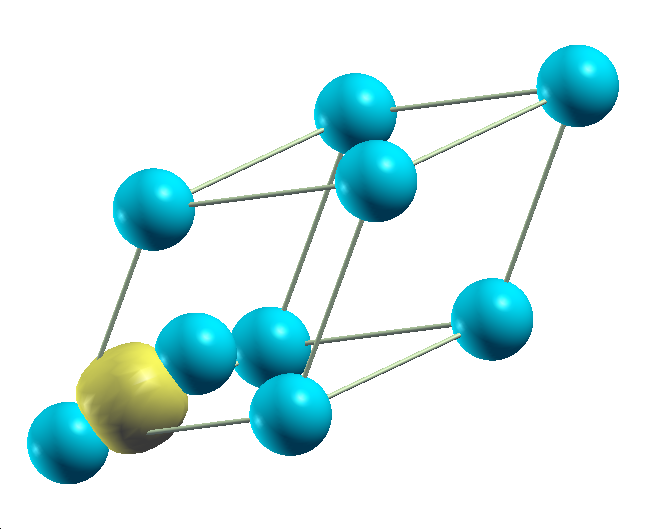" width="600" align="left"/>
</figure>

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Other Types of Plots</span>
#### <span style="color:#15317E">i) 2D Plot</span>

As a further example of visualization, we will compute and plot a two-dimensional projection of the highest occupied state of bulk Silicon on a crystal plane. For this purpose, we need to modify the <code><span style="color:green">properties</span></code> block in the input file, by replacing the sub-element <code><span style="color:green">plot3d</span></code> with <code><span style="color:green">plot2d</span></code>, as follows:

```xml
...
         <plot2d>
            <parallelogram grid="200 200">
               <origin coord="0 0 0"/>
               <point  coord="0.25 0.25 -0.25"/>
               <point  coord="0.00 0.00  0.50"/>
            </parallelogram>
         </plot2d>
...
```

In [10]:
# The following lines modify the input.xml using Python
properties = {'wfplot':
              {'kstlist': [[1, 4]],
               'plot2d': {'parallelogram':
                          {'grid': [200, 200],
                           'point': [{'coord': [0.25, 0.25, -0.25]},
                                     {'coord': [0.00, 0.00, 0.50]}],
                           'origin': {'coord': [0, 0, 0]}}}}}
                

parsed_input.properties = ExcitingPropertiesInput(**properties)

    
parsed_input.write('./run_KS_silicon/test_GS/input.xml')

In [11]:
%%bash
cd run_KS_silicon/test_GS
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(wfplot):
 2D wavefunction modulus squared written to WF2D.xml
 for k-point      1 and state      4
 


   Elapsed time = 0m1s


When the <code><span style="color:green">plot2d</span></code> element is specified, the <code><span style="color:mediumblue">grid</span></code> is defined inside a <code><span style="color:green">parallelogram</span></code>. To ensure a well resolved visualization, **200** grid points per direction are chosen here. We place the coordinate of the <code><span style="color:green">origin</span></code> in **(0, 0, 0)**, which coincides with the position of one of the two atoms in the unit cell of bulk silicon. Finally, we project the **KS** state on a rectangular plane, including on opposite vertices the two atoms in the unit cells, which is spanned by the vectors **(1/4, 1/4, -1/4)** and **(0, 0, 1/2)**.

After running the calculation, a file **WF2D.xml** will be printed. Again, we can convert it into **xsf** format by executing the follow script:

In [12]:
%%bash
cd run_KS_silicon/test_GS
python3 -m excitingscripts.convert_xml2xsf -f WF2D.xml -d 2D
cd ../..

#### <span style="color:#15317E">How to Visualize 2D-Plots in xsf Format using XCrySDen</span>

In order to visualize 2D-plots using XCrySDen, we can simply execute the following command:

In [13]:
%%bash
cd run_KS_silicon/test_GS
xcrysden --xsf WF2D.xsf >/dev/null 2>&1 &
cd ../..

An empty **XCrySDen** window will appear on the screen. As for the case of **3D** plots, to visualize the data press **Tools -> Data Grid -> OK**. A new window appears, containing the setup tools for the visualization of the plot. To obtain the graph shown in the figure below, choose the following parameters in this window:

1.    Choose **BLUE-WHITE-RED** in **Select color basis**;
2.    Choose **LOG10** in **Select scale function**;
3.    Press the **Submit** button;
4.    Do not worry if you do not see anything appearing: Since the default visualization plane is **(x,y)**, we have to rotate the view in order to properly orient the plot in the **XCrySDen** window;
5.    To do so, press **Display -> Coordinate System** in order to visualize the coordinate system;
6.    Orient the view to the **(x,z)** plane, by pressing the corresponding button on the right column of the **XCrySDen** main window;
7.    Finally, rotate around the **y** axis by pressing the button **ROT -Y** on the right column of the **XCrySDen** main window, until the **x** and **y** arrows of the coordinate system overlap completely.

The  corresponding plot should like this:

<figure>
<img src=" 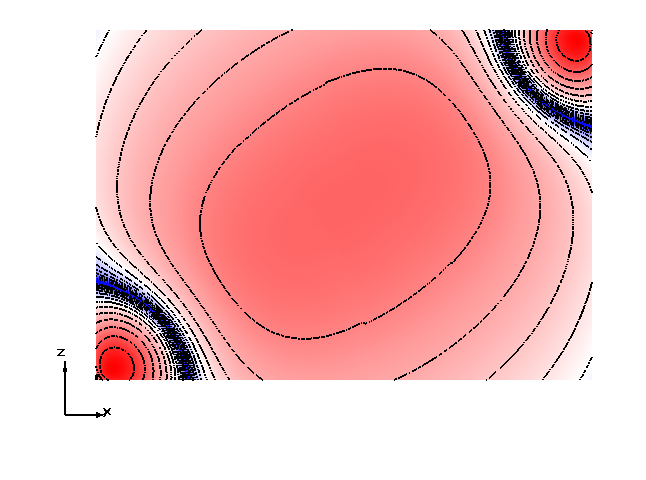" width="600" align="left"/>
</figure>

#### <span style="color:#15317E">ii) 1D Plot</span>
As a final example in this tutorial, we will calculate the **1D** plot of the probability density of the highest occupied KS state along the bond between the two inequivalent atoms in the Si unit cell. Here, we apply the element <code><span style="color:green">plot1d</span></code> to <code><span style="color:green">wfplot</span></code>, as done already for <code><span style="color:green">plot3d</span></code> and <code><span style="color:green">plot2d</span></code> in the previous sections. In order to calculate this plot, we have to insert the following block in the input file:

```xml
...
         <plot1d>
            <path steps="1000">
               <point coord="0.00 0.00 0.00"/>
               <point coord="0.25 0.25 0.25"/>
            </path>
         </plot1d>
...
```


In [14]:
# The following lines modify the input.xml using Python
properties = {'wfplot':
              {'kstlist': [[1, 4]],
               'plot1d': {'path':
                          {'steps': "1000",
                           'point': [{'coord': [0.00, 0.00, 0.00]},
                                     {'coord': [0.25, 0.25, 0.25]}]}}}}
                

parsed_input.properties = ExcitingPropertiesInput(**properties)

    
parsed_input.write('./run_KS_silicon/test_GS/input.xml')

A similar block is present also in the input file for band-structure calculations (see tutorial **Electronic band-structure and density of states**). Inside the element <code><span style="color:green">plot1d</span></code> two or more points are indicated, in order to define the path along which the desired quantity (in the case the probability density of the highest occupied **KS** state at **Γ**) is plotted. Since we are interested in visualizing such probability density along the bond between the two atoms in the unit cell, we assign to the element <code><span style="color:green">point</span></code> the coordinates of the atoms, represented here in lattice units: **(0, 0, 0)** and **(1/4, 1/4, 1/4)**). Furthermore, we choose **<span style="color:firebrick">1000 steps</span>** in the <code><span style="color:green">point</span></code> subelement to ensure a good resolution.

In [15]:
%%bash
cd run_KS_silicon/test_GS
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(wfplot):
 1D wavefunction modulus squared written to WF1D.xml
 for k-point      1 and state      4
 


   Elapsed time = 0m0s


After running exciting, a file **WF1D.xml** is printed. To convert the xml file into a printable (**agr**) format, we execute the command:

In [16]:
%%bash
cd run_KS_silicon/test_GS
xsltproc $EXCITINGROOT/xml/visualizationtemplates/plot1d2agr.xsl WF1D.xml > PLOT1D-1-4.agr
cd ../..

To visualize the file **PLOT1D-1-4.agr**, you can execute the script **`excitingscripts.plot.files`** as follows.

In [17]:
%%bash
cd run_KS_silicon/test_GS
python3 -m excitingscripts.plot.files -f PLOT1D-1-4.agr  -lx 'Distance [bohr]'  -ly 'Probability density [$10^{-3}$]'  -x 0 4.44  -ys 1000  -t 'Bulk Silicon'  -nl  -mtx 5  -mty 5
cd ../..

The resulting plot will look like this:

<figure>
<img src=" 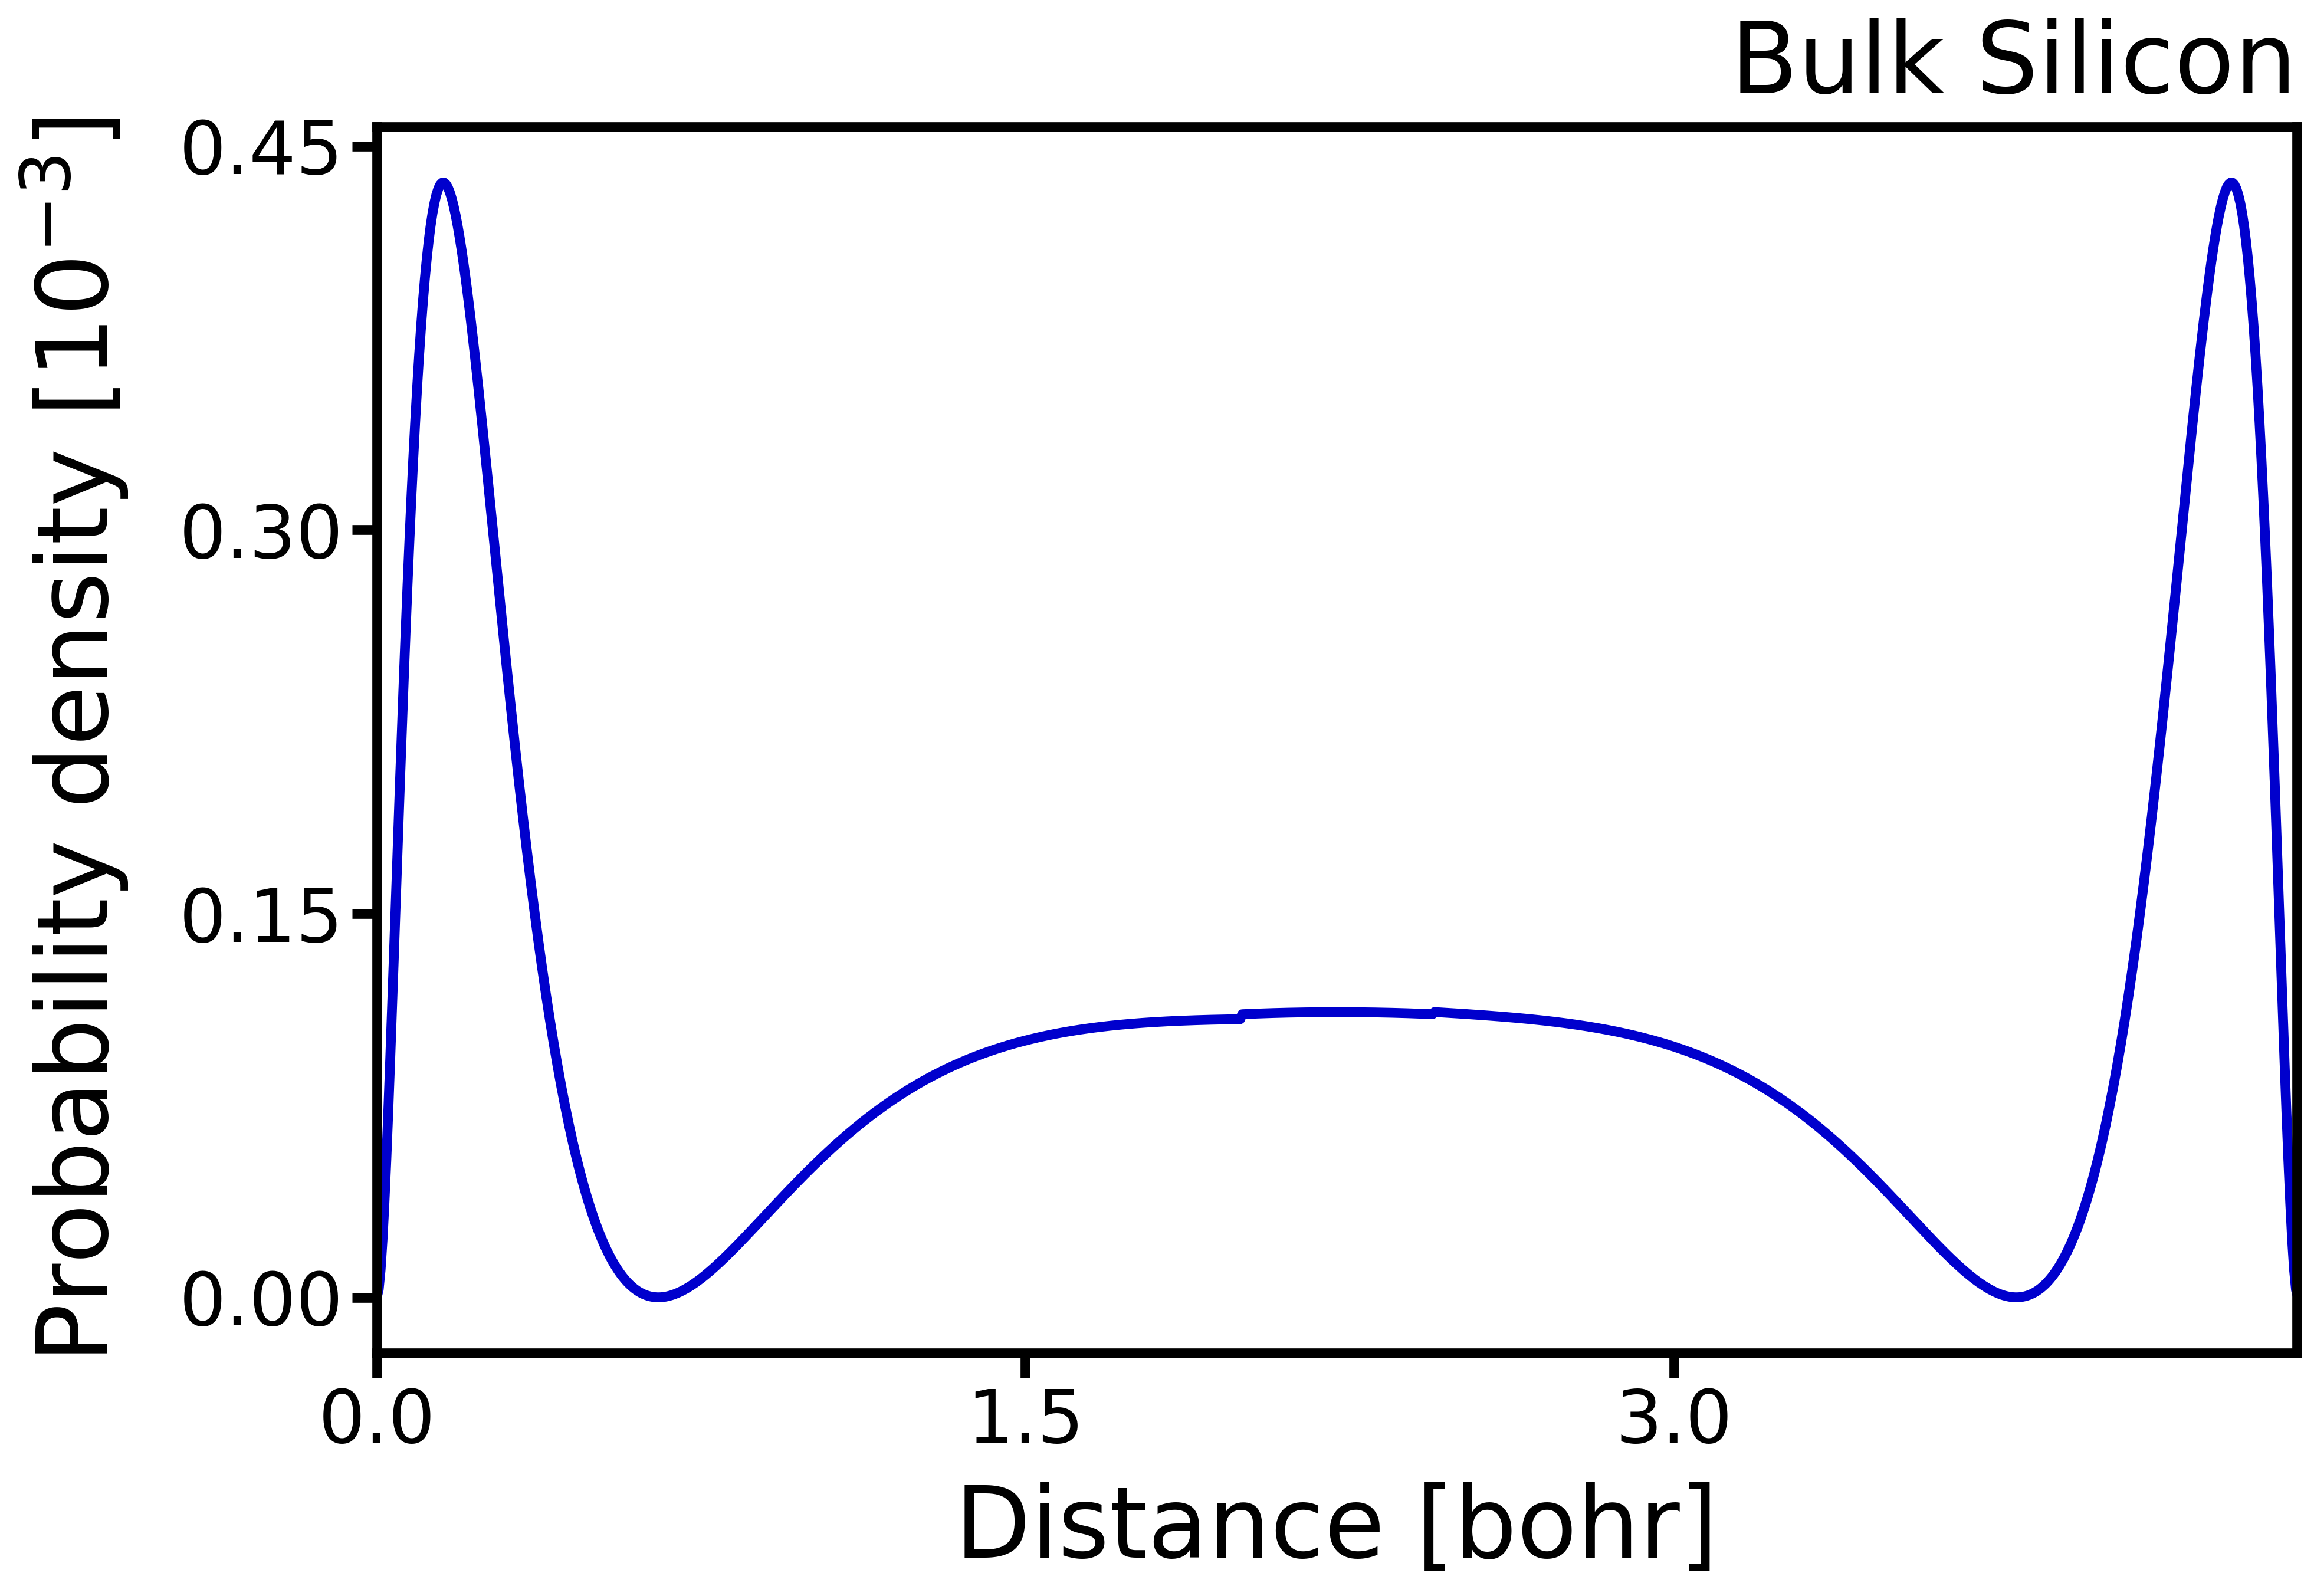" width="600" align="left"/>
</figure>

In this plot, the abscissa indicates the distance along the bond from the atom sitting at the origin. **<span style="color:firebrick">Pay attention</span>** that this distance is expressed in Bohr. In the **y** axis, the probability density of the plotted wave function is indicated. We notice the distribution of the highest occupied **KS** state along the bond between the atoms. This corresponds exactly to the isosurface and to the contour plot visualized, respectively, as **3D** and **2D** plots in the previous sections.

#### <span style="color:#15317E">iii) Plot Other Physical Quantities</span>
The elements <code><span style="color:green">plot1d</span></code>, <code><span style="color:green">plot2d</span></code>, and <code><span style="color:green">plot3d</span></code> can also be used to visualize other quantities than the probability density of a **KS** state. In the table below some of the main examples are listed:

<code><span style="color:green">plot\*d</span></code> |  Elements in <code><span style="color:green">properties</span></code> inside which <code><span style="color:green">plot\*d</span></code> can be used
:-----------|:--------------------------------
<code><span style="color:green">plot1d</span></code>|  <code><span style="color:green">wfplot</span></code>, <code><span style="color:green">chargedensityplot</span></code>, <code><span style="color:green">bandstructure</span></code>
<code><span style="color:green">plot2d</span></code>|  <code><span style="color:green">wfplot</span></code>, <code><span style="color:green">chargedensityplot</span></code>, <code><span style="color:green">fermisurfaceplot</span></code>, <code><span style="color:green">electricfield</span></code>, <code><span style="color:green">stm</span></code>
<code><span style="color:green">plot3d</span></code>|  <code><span style="color:green">wfplot</span></code>, <code><span style="color:green">chargedensityplot</span></code>, <code><span style="color:green">fermisurfaceplot</span></code>, <code><span style="color:green">electricfield</span></code>

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">Exercise</span>
- Visualize a different **KS** state. Use **1D**, **2D**, and **3D** visualization tools.
- For the example presented in this tutorial, calculate and visualize some of the physical properties reported in the above table. For further details on each properties explore [**Input Reference**](https://www.exciting-code.org/home/about/input-reference).

<hr style="border:2px solid #DDD"> </hr>